
# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle

# Specify file paths to load traffic sign images
training_file = './fig/train.p'
validation_file= './fig/valid.p'
testing_file =  './fig/test.p'

# Load pickled data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Images loaded!')

Images loaded!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### 1.1 - Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import pandas as pd

# Numbers of each dataset
n_train = len(X_train)
n_valid = len(X_validation)
n_test = len(X_test)

# Shape of X_train
image_shape = X_train[0].shape

# Unique labels and its size.
all_classes = pd.Series(y_test)
SIGN_CLASSES = all_classes.unique()
n_classes = len(SIGN_CLASSES)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print()
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(X_train.shape)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630

Image data shape = (32, 32, 3)
Number of classes = 43
(34799, 32, 32, 3)


### 1.2 - Exploratory visualization of dataset

In [3]:
## Load dependencies
import random 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline

print("Dependencies loaded!")

Dependencies loaded!


#### Plot histogram of signs (sign vs. sign_counts)

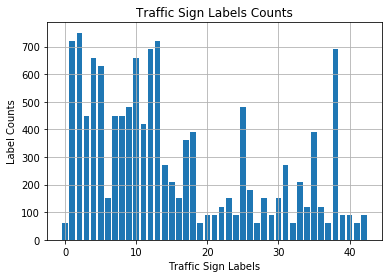

In [4]:
# histogram of the label counts
from collections import Counter
class_counts = Counter(all_classes)
x = list(class_counts.keys())
y = list(class_counts.values())
plt.bar(x, y)

plt.xlabel('Traffic Sign Labels')
plt.ylabel('Label Counts')
plt.title('Traffic Sign Labels Counts')
plt.grid(True)
plt.show()

#### Add a helper function to display four images per class (ref: [Kaggle Kernel](https://www.kaggle.com/anokas/the-nature-conservancy-fisheries-monitoring/finding-boatids))


In [5]:
# Helper function to show four images                   
def show_four(imgs, title):
    select_imgs = [imgs[np.random.choice(len(imgs))] for _ in range(4)]
    _, ax = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(4, 1))
    plt.suptitle(title, size=12, y = 1.08)
    for i, img in enumerate(select_imgs):
        ax[i].imshow(img)
        ax[i].axis('off')

#### Display four images of each class

In [6]:
# First, a dictionary of label: 4ximages 
label_sorted = sorted(SIGN_CLASSES)
four_img_each = {}

# initialize four_img_each dictionary
for label in label_sorted:
    four_img_each[label] = []

for i in range(len(X_train))[0::10]:
    label = y_train[i]
    
    if (len(four_img_each[label]) < 4):
        four_img_each[label].append(X_train[i])
    
    if all(len(four_img_each[key]) == 4 for key in label_sorted):
        break

print('complete!')

complete!


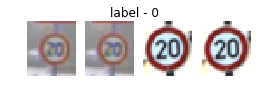

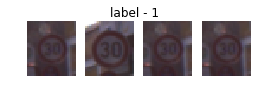

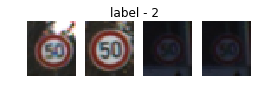

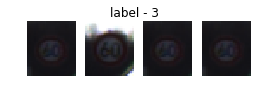

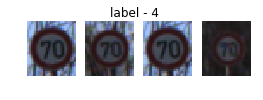

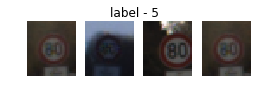

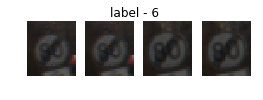

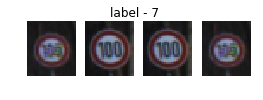

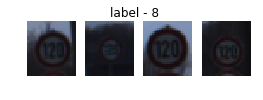

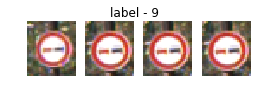

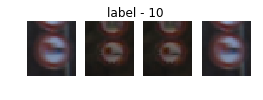

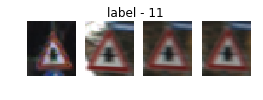

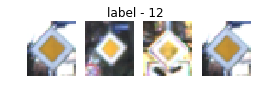

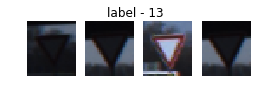

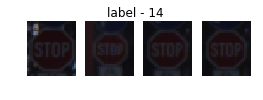

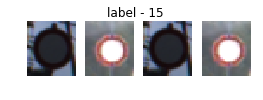

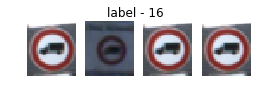

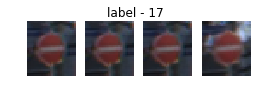

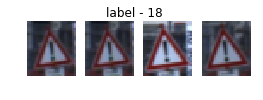

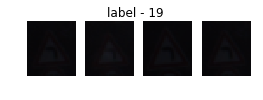

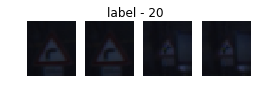

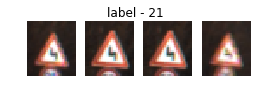

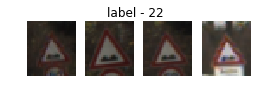

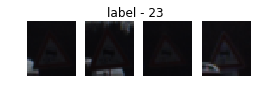

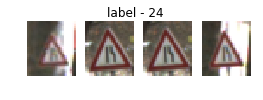

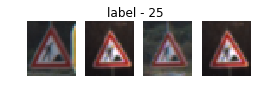

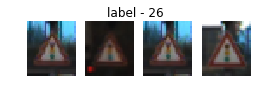

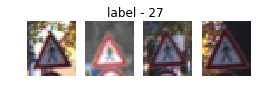

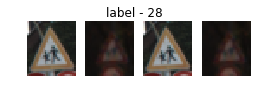

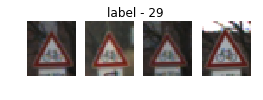

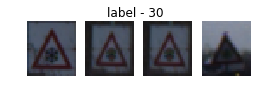

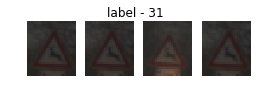

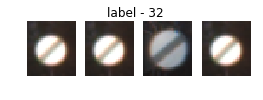

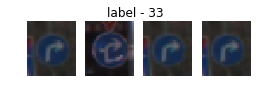

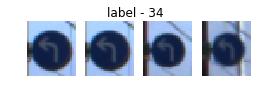

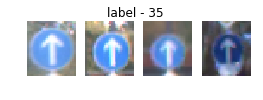

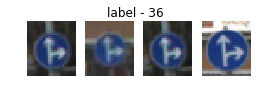

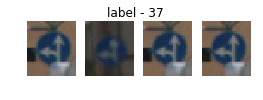

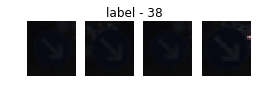

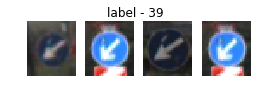

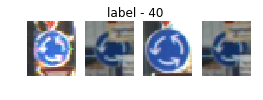

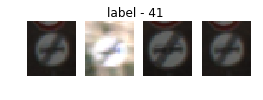

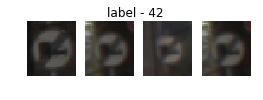

In [7]:
for label in label_sorted:
    show_four(four_img_each[label], "label - {}".format(label))

#### Dark and light images  
Just for reference: [image normalization from Stack Overflow](http://localhost:8888/notebooks/LeNet-Lab-Solution.ipynb?token=828d84e72c61e6cc3c2903d3eb303f0419db82fdbac2a73b)

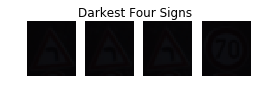

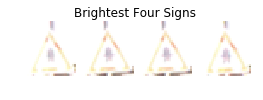

In [8]:
avg_px = []

for i in range(len(X_train)):
    avg_px.append([i, np.mean(X_train[i])])

avg_px.sort(key=lambda x: x[1])

bright_four = [X_train[i[0]] for i in avg_px[-4:]] 
dark_four = [X_train[i[0]] for i in avg_px[:3]]

show_four(dark_four, 'Darkest Four Signs')
show_four(bright_four, 'Brightest Four Signs')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### 2.1 - Pre-process the Data Set 
#### Normalize images [reference](http://cs231n.github.io/neural-networks-2/)  
Data Processing *was* conducted but after assessing accuracies from training with the processed images, I decided to not use them. Unprocessed images did a better job predicting traffic signs.

Number of data: 34799, Size of data: [32, 32, 3] before processing
Number of data: 34799, Size of data: [32, 32, 3] after Mean subtraction
Number of data: 34799, Size of data: [32, 32, 3] after normalization


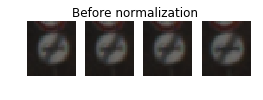

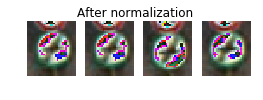

In [9]:
N, *D = X_train.shape
print("Number of data: {}, Size of data: {} before processing".format(N, str(D)))

# Mean subtraction
X_mean_sub = np.subtract(X_train, np.mean(X_train, axis = 0), casting="unsafe")
N, *D = X_mean_sub.shape
print("Number of data: {}, Size of data: {} after Mean subtraction".format(N, str(D)))

# Method 1 - Normalization
X_norm = np.divide(X_mean_sub, np.std(X_mean_sub, axis = 0), casting="unsafe")
N, *D = X_norm.shape
print("Number of data: {}, Size of data: {} after normalization".format(N, str(D)))

show_four(X_train[:4], "Before normalization")
show_four(X_norm[:4], "After normalization")

# TODO: Why do images shuffle?

### 2.2 - Input Data 


In [10]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### 2.3 - Model Architecture (Modified LeNet)
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 3 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [11]:
# Setup Epoch and Batchsize
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 100

In [12]:
from tensorflow.contrib.layers import flatten
dropout = 0.5 # Dropout, probability to keep units

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.local_response_normalization(conv1)
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.local_response_normalization(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#### Features and Labels

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### 2.4 Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Training Pipelines
Create a training pipeline that uses the model to classify Traffic Sign data.

In [14]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.471

EPOCH 2 ...
Validation Accuracy = 0.675

EPOCH 3 ...
Validation Accuracy = 0.749

EPOCH 4 ...
Validation Accuracy = 0.798

EPOCH 5 ...
Validation Accuracy = 0.835

EPOCH 6 ...
Validation Accuracy = 0.852

EPOCH 7 ...
Validation Accuracy = 0.867

EPOCH 8 ...
Validation Accuracy = 0.878

EPOCH 9 ...
Validation Accuracy = 0.884

EPOCH 10 ...
Validation Accuracy = 0.896

EPOCH 11 ...
Validation Accuracy = 0.892

EPOCH 12 ...
Validation Accuracy = 0.894

EPOCH 13 ...
Validation Accuracy = 0.906

EPOCH 14 ...
Validation Accuracy = 0.902

EPOCH 15 ...
Validation Accuracy = 0.911

Model saved


In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.895


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### 3.1 Load and Output the Images

file names of 5 test images loaded!
5 test images loaded with each dimension of (32, 32, 3)


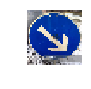

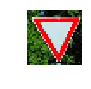

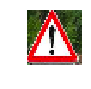

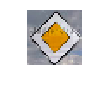

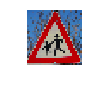

In [18]:
### Load the images and plot them here.
# Specify file paths to load traffic sign images
import cv2 as cv
import os

path = './test_fig/'
pros = './processed/'

test_images = []

# load test image names
listing = os.listdir(path)
print("file names of {} test images loaded!".format(len(listing)))

for name in listing:
    # read image file
    test_image = cv.imread(path + name)
    # convert color from bgr to rgb
    test_image = cv.cvtColor(test_image, cv.COLOR_BGR2RGB)
    # resize image to 32x32 and save to the same list
    test_image = cv.resize(test_image, (32, 32))
    # append to test images list
    test_images.append(test_image)
    
# reformat python list to numpy array
test_images = np.array(test_images)


# Display all test images
i = 0
for i in range(len(test_images)):
    figure = plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(test_images[i])
    i += 1
    
    
# change dtype of images to be properly fed to Tensorflow|
test_images = test_images.astype(np.float32)
print("{} test images loaded with each dimension of {}".format(test_images.shape[0], test_images.shape[1:]))

#### Hard code traffic sign labels

In [19]:
test_labels = [38, 13, 18, 12, 28]
test_labels = np.array(test_labels)
print("labels loaded!")

labels loaded!


### Predict the Sign Type for Each Image

In [20]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(test_images, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Great thanks to juan_487767 from [Udacity SDCND Forum](https://discussions.udacity.com/t/interpreting-predictions-on-new-images/219657/7)

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_logits = tf.nn.softmax(logits)
    result = sess.run(softmax_logits, feed_dict={x: test_images})
    values, indices = tf.nn.top_k(result, 5)
    probs = sess.run(values)
    predictions = sess.run(indices)

    
print("Completed!")

Completed!


In [22]:
for true_label_idx in range(len(test_labels)):
    print("True Label {} Predicted as".format(test_labels[true_label_idx]))
    
    predicted_labels = predictions[true_label_idx]
    predicted_probs = probs[true_label_idx]
    for pred_index in range(5):
        print("     Label {} : {}%".format(predicted_labels[pred_index], round(predicted_probs[pred_index]*100, 3)))
    print("\n")

True Label 38 Predicted as
     Label 38 : 99.999%
     Label 40 : 0.001%
     Label 20 : 0.0%
     Label 36 : 0.0%
     Label 32 : 0.0%


True Label 13 Predicted as
     Label 13 : 100.0%
     Label 3 : 0.0%
     Label 15 : 0.0%
     Label 25 : 0.0%
     Label 2 : 0.0%


True Label 18 Predicted as
     Label 18 : 70.893%
     Label 26 : 19.798%
     Label 39 : 5.375%
     Label 27 : 1.068%
     Label 20 : 1.045%


True Label 12 Predicted as
     Label 12 : 99.965%
     Label 14 : 0.033%
     Label 11 : 0.001%
     Label 10 : 0.001%
     Label 6 : 0.0%


True Label 28 Predicted as
     Label 28 : 97.657%
     Label 29 : 2.003%
     Label 24 : 0.27%
     Label 26 : 0.026%
     Label 20 : 0.015%




---

## Step 4: Visualize the Neural Network's State with Test Images *(To be completed after first review!)*

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [23]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 